In [100]:
#Superdense Coding- Getting 2 from 1
#Communicating one qubit, we can retrieve 2 classical bits of information
#b1,b2 are 2 bits that alice wants to send to Bob. 
#First entangled pair is shared between both of them.
#if b2 = 1, Alice applies X gate
#if b1 = 1, Alice applies Z gate

In [105]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random,time

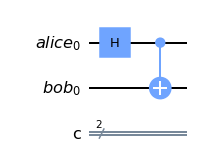

In [110]:

alice = QuantumRegister(1, name= 'alice')
bob = QuantumRegister(1, name= 'bob')
c = ClassicalRegister(2, name= 'c')

circ = QuantumCircuit(alice,bob,c)
circ.h(alice)
circ.cx(alice,bob)
circ.draw(output = 'mpl')

0 1


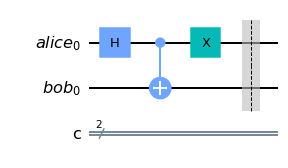

In [111]:
b1 = random.randint(0,1)
b2 = random.randint(0,1)
print(b1,b2)
if b2 == 1:
    circ.x(alice)
if b1 == 1:
    circ.z(alice)
circ.barrier()
circ.draw(output = 'mpl')



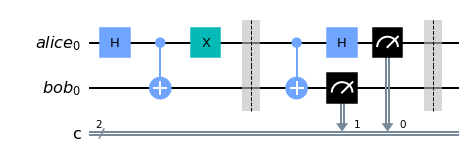

In [112]:
circ.cx(alice,bob)
circ.h(alice)
circ.measure([alice[0],bob[0]], c)
circ.barrier()
circ.draw(output='mpl')

In [113]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend,shots=1,memory= True)
result = job.result()
output = result.get_memory()
print(output[0][1], output[0][0])

0 1
